In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pylab as pylab
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [36]:
data1 = pd.read_csv("21-01-2022-results.csv")
data1b = pd.read_csv("21-01-2022-resultsb.csv")
data1c = pd.read_csv("21-01-2022-resultsc.csv")
data2 = pd.read_csv("15-01-2022-results.csv")
#data = pd.read_csv("26-02-2022-results_2d.csv")
data = pd.concat([data1, data2,data1b, data1c])
data.shape[0]/8

15.0

In [37]:
#data.to_csv('1d_final_08032022.csv')
data2d=pd.read_csv('01-03-2022-results_2d_final.csv')

In [38]:
baseline = data[data['aux_loss_activated']==False]

In [39]:
data = pd.concat([baseline, data2d])
data = data[data.n!=100000]

In [40]:
data.groupby(['n','aux_loss_activated']).count()

Unnamed: 0  acc_train  acc_test  epsilon  \
n     aux_loss_activated                                             
5000  False                       15         15        15       15   
      True                        10         10        10       10   
10000 False                       15         15        15       15   
      True                        10         10        10       10   
50000 False                       15         15        15       15   
      True                        10         10        10       10   

                          batch_size  hidden_size  EPS1  opt  
n     aux_loss_activated                                      
5000  False                       15           15    15   15  
      True                        10           10    10   10  
10000 False                       15           15    15   15  
      True                        10           10    10   10  
50000 False                       15           15    15   15  
      True                        10           10    10   10

In [41]:
#data = pd.read_csv("03-01-2022-results-positive-injection.csv")

#data = data.sort_values('acc_test')
#data = data[data.n!=50000]
#data = pd.concat([data, data2])
#data.shape

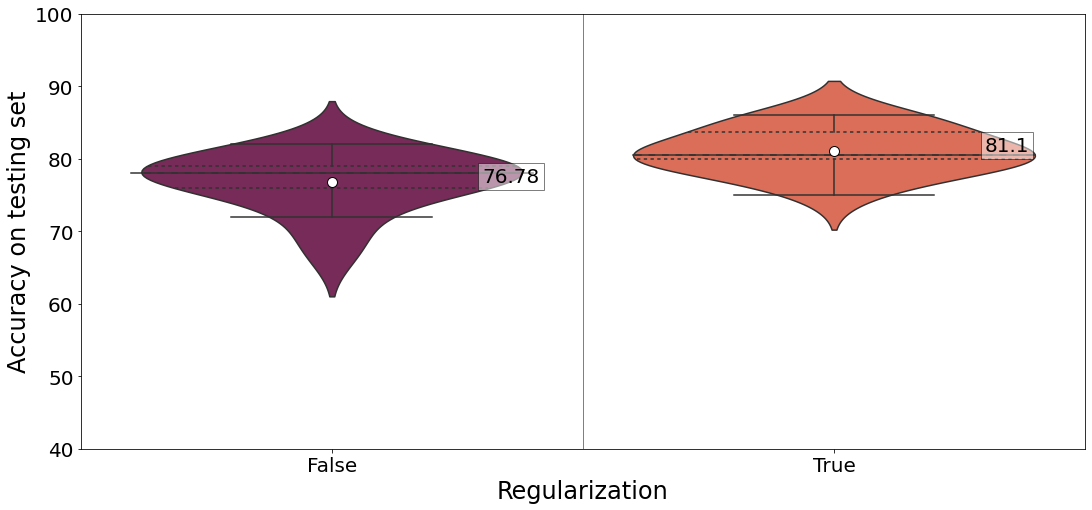

In [42]:
plt.figure(figsize=(18,8))
plt.ylim(40,100)
sns.boxplot(x="aux_loss_activated", y="acc_test", palette='rocket',showmeans=True, showfliers=False, showbox=False, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.violinplot( x="aux_loss_activated",bw=0.8, y="acc_test",inner="quartile", palette='rocket', showmeans=True, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
yposlist = data.groupby(['aux_loss_activated'])['acc_test'].mean().tolist()
yposlist_false = data.groupby(['aux_loss_activated'])['acc_test'].mean().tolist()

xposlist = range(len(yposlist))
stringlist = [str(i) for i in np.round(yposlist,2)]

xposlist_false = range(len(yposlist_false))
stringlist_false = [str(i) for i in np.round(yposlist_false,2)]

for i in range(len(stringlist)):
    ax.text(xposlist[i]+0.3, yposlist[i], stringlist[i],size=20, bbox=dict(facecolor='white', alpha=0.5))

    

for i in range(len(np.unique(data['aux_loss_activated'])) - 1):
    ax.axvline(i + 0.5, color='grey', lw=1)
    
# When creating the legend, only use the first two elements
# to effectively remove the last two.
#l = plt.legend(handles[0:2], labels[0:2],fontsize = 20, bbox_to_anchor= (1.03, 1), title="Regularization", title_fontsize = 18, shadow = True, facecolor = 'white', loc=2);
ax.set_xlabel("Regularization",fontsize=24)
ax.set_ylabel("Accuracy on testing set",fontsize=24)
ax.tick_params(labelsize=20)

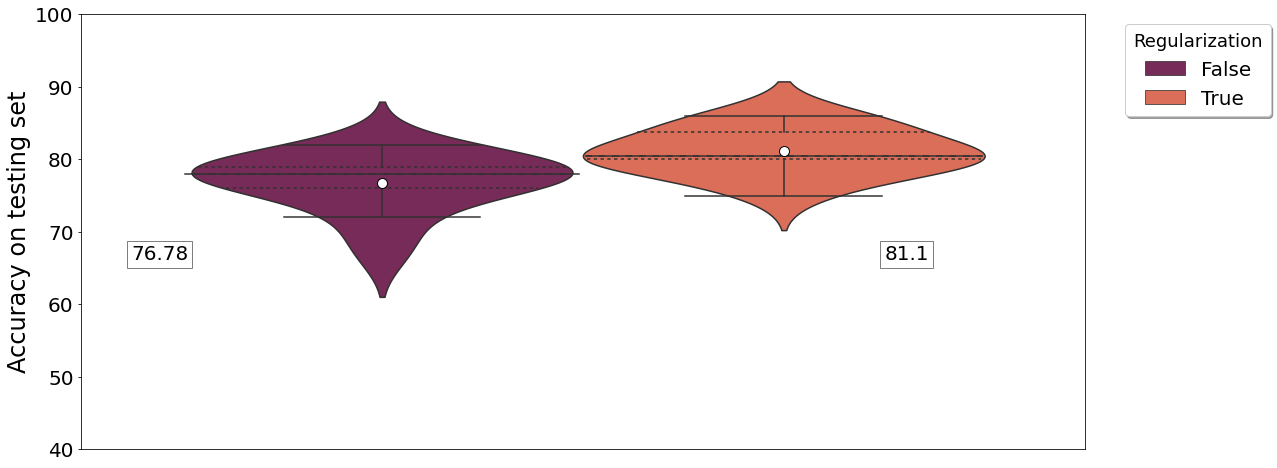

In [43]:
plt.figure(figsize=(18,8))
plt.ylim(40,100)
sns.boxplot(x="EPS1", y="acc_test", palette='rocket', hue='aux_loss_activated',showmeans=True, showfliers=False, showbox=False, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.violinplot( x="EPS1",bw=0.8, y="acc_test",inner="quartile", palette='rocket', hue='aux_loss_activated',showmeans=True, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
yposlist = data[(data.aux_loss_activated==True)].groupby(['EPS1'])['acc_test'].mean().tolist()
yposlist_false = data[(data.aux_loss_activated==False)].groupby(['EPS1'])['acc_test'].mean().tolist()

xposlist = range(len(yposlist))
stringlist = [str(i) for i in np.round(yposlist,2)]

xposlist_false = range(len(yposlist_false))
stringlist_false = [str(i) for i in np.round(yposlist_false,2)]

for i in range(len(stringlist)):
    ax.text(xposlist[i]+0.3, yposlist[i]-15, stringlist[i],size=20, bbox=dict(facecolor='white', alpha=0.5))

    
for i in range(len(stringlist_false)):    
    ax.text(xposlist_false[i]-0.45, yposlist[i]-15, stringlist_false[i],size=20, bbox=dict(facecolor='white', alpha=0.5))

for i in range(len(np.unique(data['EPS1'])) - 1):
    ax.axvline(i + 0.5, color='grey', lw=1)
    
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2],fontsize = 20, bbox_to_anchor= (1.03, 1), title="Regularization", title_fontsize = 18, shadow = True, facecolor = 'white', loc=2);
ax.set_xlabel("",fontsize=24)
ax.set_ylabel("Accuracy on testing set",fontsize=24)
ax.tick_params(labelsize=20)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)

In [44]:
#data = pd.read_csv("28-12-2021-results.csv")
#data = data[(data.n!=20000)]
#data = data.sort_values('acc_test')
#data

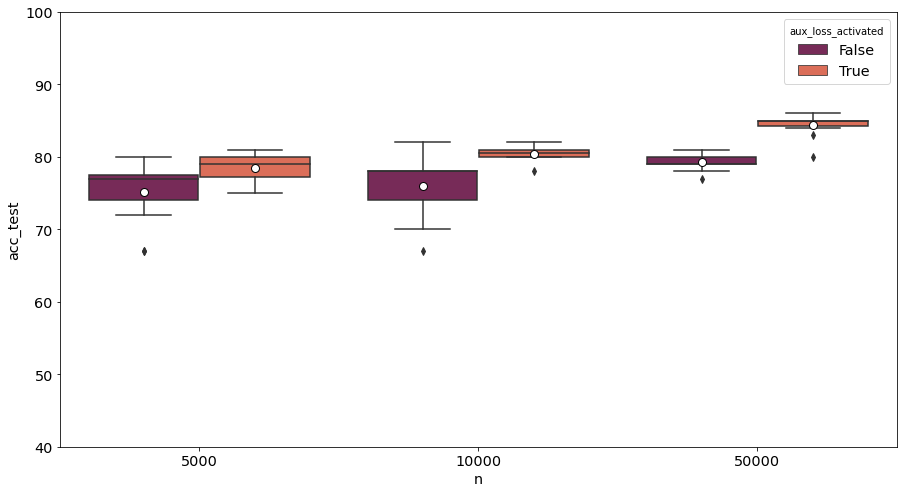

In [45]:
plt.figure(figsize=(15,8))
plt.ylim(40,100)
ax = sns.boxplot(x="n", y="acc_test", palette='rocket', hue='aux_loss_activated',showmeans=True, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"})

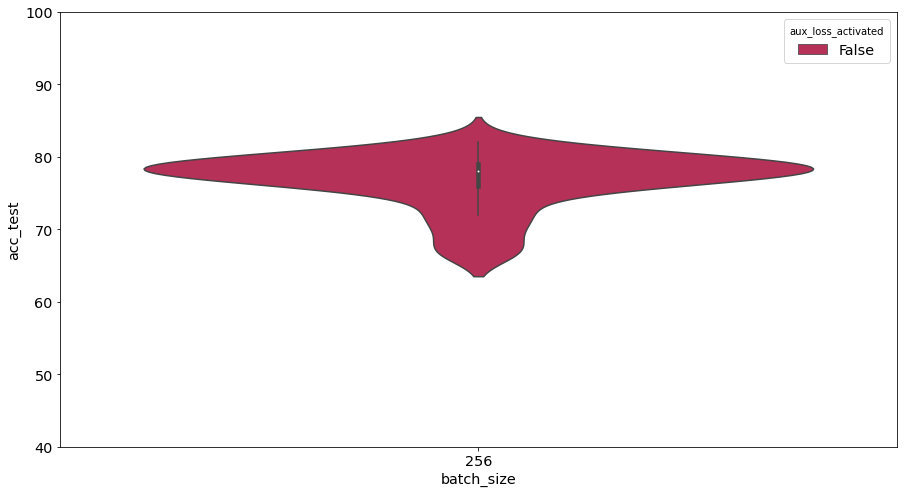

In [46]:
plt.figure(figsize=(15,8))
plt.ylim(40,100)
ax = sns.violinplot(x="batch_size", y="acc_test", palette='rocket', hue='aux_loss_activated',showmeans=True, data=data[(data.opt==2)
                                                                                                                           
        ],
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"})

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(0, 50.0, '50%'),
 Text(0, 60.0, '60%'),
 Text(0, 70.0, '70%'),
 Text(0, 80.0, '80%'),
 Text(0, 90.0, '90%'),
 Text(0, 100.0, '100%')]

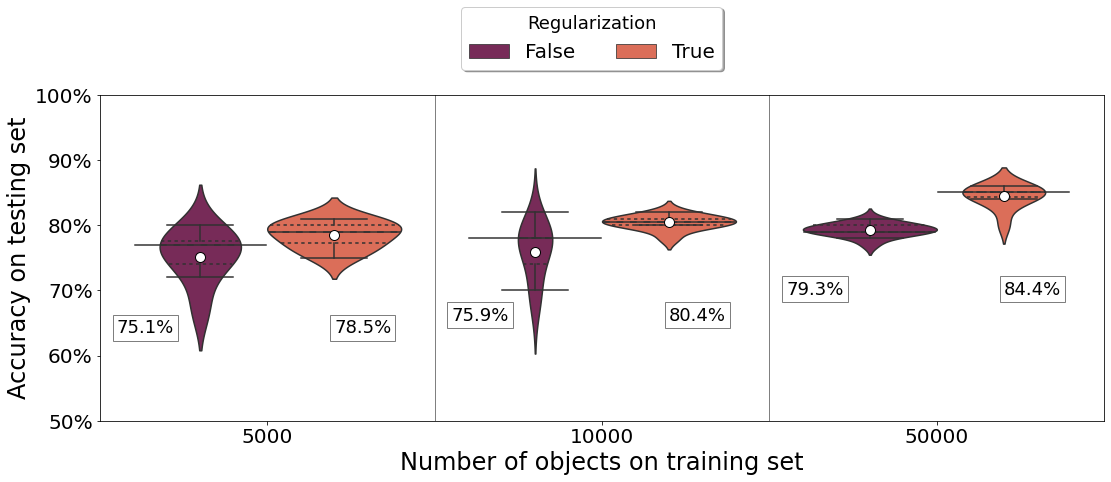

In [47]:
plt.figure(figsize=(18,6))
plt.ylim(50,100)
sns.boxplot(x="n", y="acc_test", palette='rocket', hue='aux_loss_activated',showmeans=True, showfliers=False, showbox=False, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.violinplot( x="n",bw=0.8, y="acc_test",inner="quartile", palette='rocket', hue='aux_loss_activated',showmeans=True, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
yposlist = data[(data.aux_loss_activated==True) ].groupby(['n'])['acc_test'].mean().tolist()
yposlist_false = data[(data.aux_loss_activated==False) ].groupby(['n'])['acc_test'].mean().tolist()

xposlist = range(len(yposlist))
stringlist = [str(i) for i in np.round(yposlist,1)]

xposlist_false = range(len(yposlist_false))
stringlist_false = [str(i) for i in np.round(yposlist_false,1)]

for i in range(len(stringlist)):
    ax.text(xposlist[i]+0.2, yposlist[i]-15, '{}%'.format(stringlist[i]),size=18, bbox=dict(facecolor='white', alpha=0.5))

    
for i in range(len(stringlist_false)):    
    ax.text(xposlist_false[i]-0.45, yposlist[i]-15, '{}%'.format(stringlist_false[i]),size=18, bbox=dict(facecolor='white', alpha=0.5))

for i in range(len(np.unique(data['n'])) - 1):
    ax.axvline(i + 0.5, color='grey', lw=1)
    
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2],fontsize = 20, bbox_to_anchor= (0.35, 1.1, 0.5, 0.2), title="Regularization", ncol=2, title_fontsize = 18, shadow = True, facecolor = 'white', loc=2);
ax.set_xlabel("Number of objects on training set",fontsize=24)
ax.set_ylabel("Accuracy on testing set",fontsize=24)
ax.tick_params(labelsize=20)
ax.set_yticklabels(['{}%'.format(int(x)) for x in ax.get_yticks()])


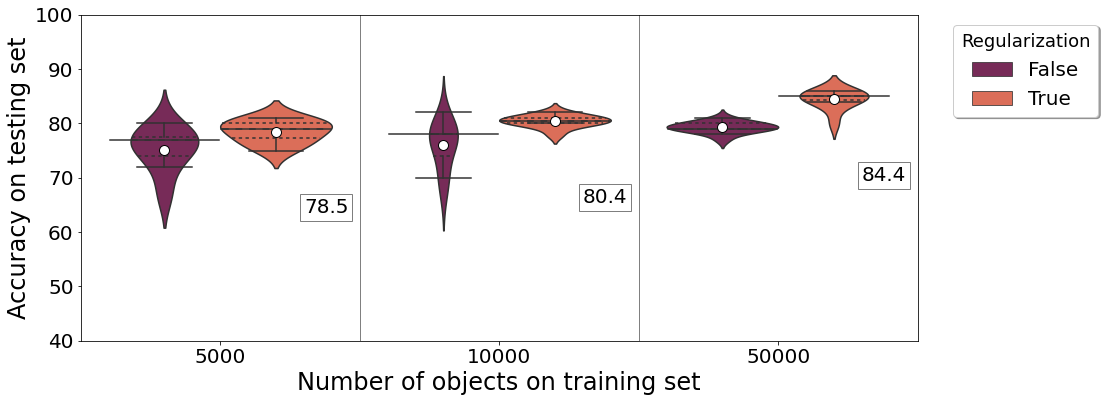

In [48]:
plt.figure(figsize=(15,6))
plt.ylim(40,100)
sns.boxplot(x="n", y="acc_test", palette='rocket', hue='aux_loss_activated',showmeans=True, showfliers=False, showbox=False, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.violinplot(x="n",bw=0.8, y="acc_test",inner="quartile", palette='rocket', hue='aux_loss_activated',showmeans=True, data=data,
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

yposlist = data[(data.aux_loss_activated==True) & (data.opt==1)].groupby(['n'])['acc_test'].mean().tolist()
yposlist_false = data[(data.aux_loss_activated==False) & (data.opt==1)].groupby(['n'])['acc_test'].mean().tolist()

xposlist = range(len(yposlist))
stringlist = [str(i) for i in yposlist]

xposlist_false = range(len(yposlist_false))
stringlist_false = [str(i) for i in yposlist_false]

for i in range(len(stringlist)):
    ax.text(xposlist[i]+0.3, yposlist[i]-15, stringlist[i],size=20, bbox=dict(facecolor='white', alpha=0.5))

    
for i in range(len(stringlist_false)):    
    ax.text(xposlist_false[i]-0.45, yposlist[i]-15, stringlist_false[i],size=20, bbox=dict(facecolor='white', alpha=0.5))

for i in range(len(np.unique(data['n'])) - 1):
    ax.axvline(i + 0.5, color='grey', lw=1)
    
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2],fontsize = 20, bbox_to_anchor= (1.03, 1), title="Regularization", title_fontsize = 18, shadow = True, facecolor = 'white', loc=2);
ax.set_xlabel("Number of objects on training set",fontsize=24)
ax.set_ylabel("Accuracy on testing set",fontsize=24)
ax.tick_params(labelsize=20)

In [49]:
from scipy import stats
from scipy.stats import wilcoxon, ttest_ind, ttest_rel


for n in data.n.unique():
    samples1 = data[(data.aux_loss_activated==False) & (data.batch_size>128)].acc_test.to_list()
    samples2 = data[(data.aux_loss_activated==True) & (data.batch_size>128)].acc_test.to_list()
    print(n)
    print(np.mean(samples1))
    print(np.mean(samples2))
           
    stat, p = ttest_rel(samples1, samples2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

    
        

5000
76.77777777777777
81.1


ValueError: unequal length arrays

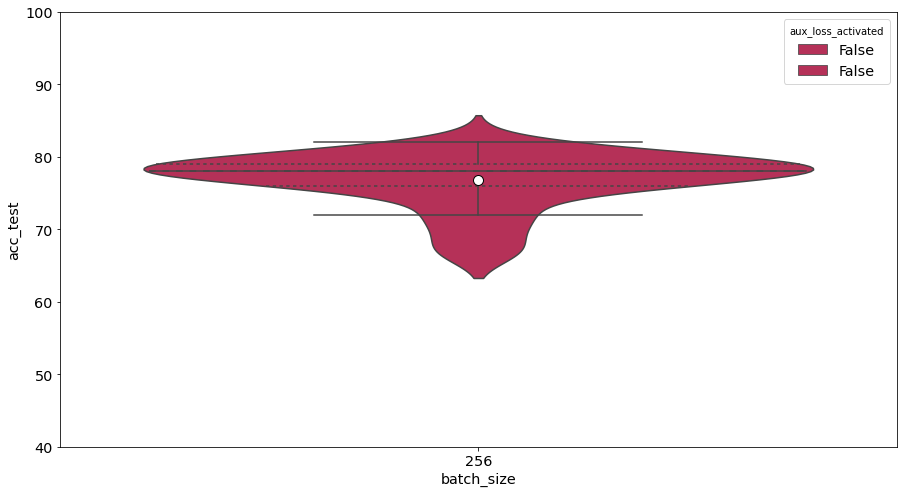

In [50]:
plt.figure(figsize=(15,8))
plt.ylim(40,100)
sns.boxplot(x="batch_size", y="acc_test", palette='rocket', hue='aux_loss_activated',showmeans=True, showfliers=False, showbox=False, data=data[data.opt==2],
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax = sns.violinplot(x="batch_size",bw=0.5, y="acc_test",inner="quartile", palette='rocket', hue='aux_loss_activated',showmeans=True, data=data[(data.opt==2)
                                                                                                                                      
                                                                                                                           
                                                                                                                           ],
                meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})


In [51]:
#data = pd.read_csv("17-04-2021-results.csv")
#data = data[data.opt!=3]

30
45


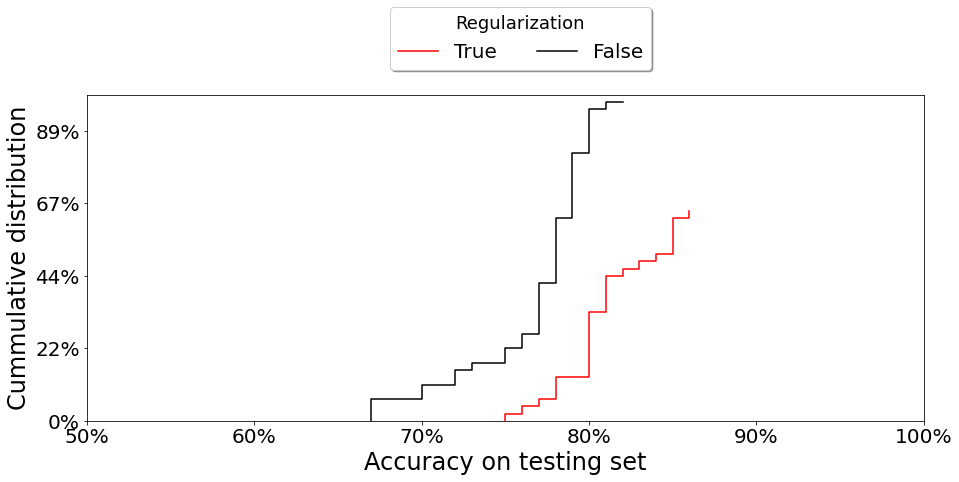

/home/franciscoperez/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/franciscoperez/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


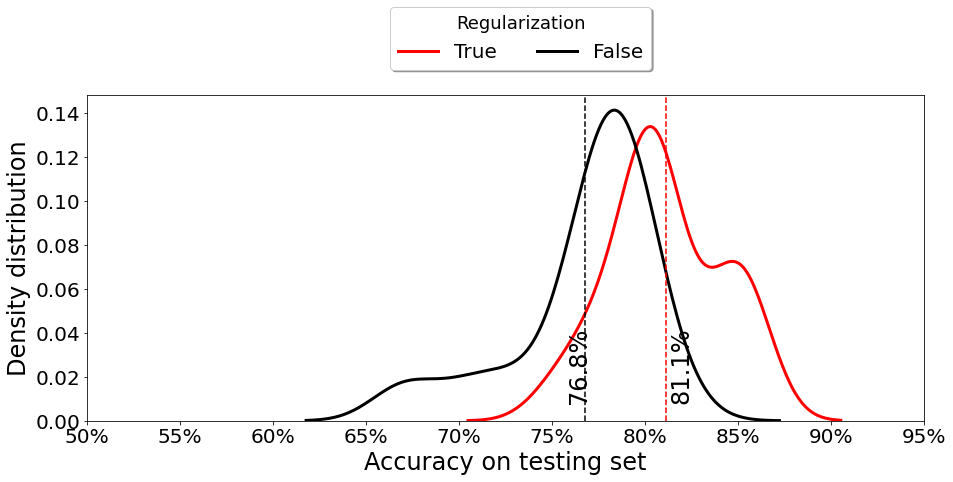

In [52]:
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(15,6))
losses = [True, False]

colors = ['red', 'black']
# Iterate through the five airlines
i= 0
for loss in losses:
    # Subset to the airline
    subset = data[data['aux_loss_activated'] == loss]['acc_test']
    #data = np.random.randn(1000)
    print(subset.shape[0])
    sorted_data = np.sort(subset)  # Or data.sort(), if data can be modified

    # Cumulative counts:
    plt.step(sorted_data, np.arange(sorted_data.size), color=colors[i], label=loss)  # From 0 to the number of data points-1
    #plt.step(sorted_data[::-1], np.arange(sorted_data.size))  # From the number of data points-1 to 0

    #plt.show()
    i=i+1
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=subset.shape[0]))
ax.xaxis.set_major_formatter(ticker.PercentFormatter())
ax.set_xlabel("Accuracy on testing set",fontsize=24)
ax.set_ylabel("Cummulative distribution",fontsize=24)


plt.legend(title = "Regularization", prop={'size':20},
           loc='upper left', bbox_to_anchor= (0.35, 1.1, 0.5, 0.2),
           ncol=2, title_fontsize = 18, shadow = True, facecolor = 'white')

ax.tick_params(labelsize=20)



#plt.axvline(x=data[(data.aux_loss_activated==True)]['acc_test'].max(), ymin=0., ymax=1, color='red', linestyle='dashed')
#plt.axvline(x=data[(data.aux_loss_activated==False)]['acc_test'].max(), ymin=0, ymax=1, color='black', linestyle='dashed')




plt.xlim(50,100)
plt.ylim(0,subset.shape[0])
plt.show()



fig, ax = plt.subplots(figsize=(15,6))

i= 0
for loss in losses:
    # Subset to the airline
    subset = data[data['aux_loss_activated'] == loss]
    
    # Draw the density plot
    sns.distplot(subset['acc_test'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = loss, color= colors[int(i)])
    i=i+1

plt.xlim(50,95)
plt.xlabel('Accuracy on testing set',fontsize=24)
plt.ylabel('Density distribution',fontsize=24)
plt.legend(title = "Regularization", prop={'size':20},
           loc='upper left', bbox_to_anchor= (0.35, 1.1, 0.5, 0.2),
           ncol=2, title_fontsize = 18, shadow = True, facecolor = 'white')
plt.axvline(x=data[(data.aux_loss_activated==True)]['acc_test'].mean(), ymin=0., ymax=1, color='red', linestyle='dashed')
plt.axvline(x=data[(data.aux_loss_activated==False)]['acc_test'].mean(), ymin=0, ymax=1, color='black', linestyle='dashed')

mean1 = np.round(data[data.aux_loss_activated==True]['acc_test'].mean(),1)
mean2 = np.round(data[data.aux_loss_activated==False]['acc_test'].mean(),1)
plt.text(mean1+0.2, 0.01,'{}%'.format(str(mean1)),rotation=90, fontsize=24)
plt.text(mean2-1, 0.01,'{}%'.format(str(mean2)),rotation=90, fontsize=24)
fmt = '%.0f%%'
xticks = matplotlib.ticker.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
ax.tick_params(labelsize=20)

plt.show()


/home/franciscoperez/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/franciscoperez/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
posx and posy should be finite values
posx and posy should be finite values


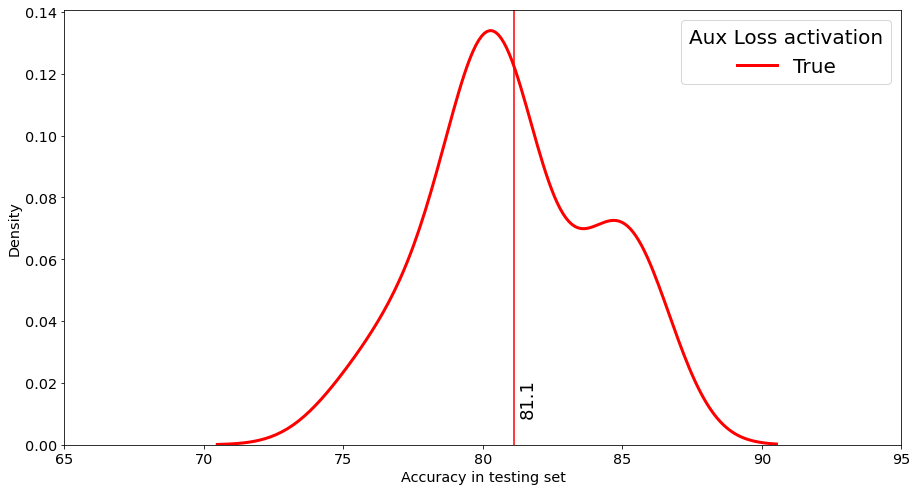

posx and posy should be finite values
posx and posy should be finite values


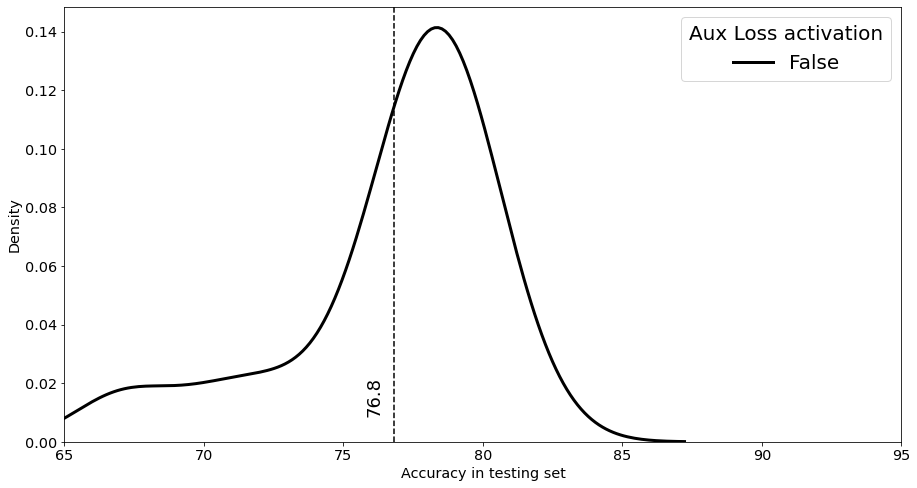

In [53]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(15,8))
losses = [True, False]

colors = ['red', 'black']
opt = 1
i= 0
for loss in losses:
    # Subset to the airline
    subset = data[(data['aux_loss_activated'] == loss) & (data['opt'] == opt) ]
    
    # Draw the density plot
    sns.distplot(subset['acc_test'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = loss, color= colors[int(i)])
    i=i+1

plt.xlim(65,95)
plt.xlabel('Accuracy in testing set')
plt.ylabel('Density')
plt.legend(title = "Aux Loss activation", prop={'size':20}, title_fontsize=20 )
mean1 = np.round(data[(data.aux_loss_activated==True) & (data['opt'] == opt)]['acc_test'].mean(),1)
mean2 = np.round(data[(data.aux_loss_activated==False) & (data['opt'] == opt)]['acc_test'].mean(),1)
plt.axvline(x=mean1, ymin=0., ymax=1, color='red')
plt.axvline(x=mean2, ymin=0, ymax=1, color='black')

plt.text(mean1+0.2, 0.01,str(mean1),rotation=90, fontsize=18)
plt.text(mean2-1, 0.01,str(mean2),rotation=90, fontsize=18)
plt.show()


fig, ax = plt.subplots(figsize=(15,8))
opt = 2
i= 0
for loss in losses:
    # Subset to the airline
    subset = data[(data['aux_loss_activated'] == loss) & (data['opt'] == opt) ]
    
    # Draw the density plot
    sns.distplot(subset['acc_test'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = loss, color= colors[int(i)])
    i=i+1

plt.xlim(65,95)
plt.xlabel('Accuracy in testing set')
plt.ylabel('Density')
plt.legend(title = "Aux Loss activation", prop={'size':20}, title_fontsize=20 )


mean1 = np.round(data[(data.aux_loss_activated==True) & (data['opt'] == opt)]['acc_test'].mean(),1)
mean2 = np.round(data[(data.aux_loss_activated==False) & (data['opt'] == opt)]['acc_test'].mean(),1)

plt.axvline(x=mean1, ymin=0., ymax=1, color='red', linestyle='dashed')
plt.axvline(x=mean2, ymin=0, ymax=1, color='black', linestyle='dashed')

plt.text(mean1+0.2, 0.01,str(mean1),rotation=90, fontsize=18)
plt.text(mean2-1, 0.01,str(mean2),rotation=90, fontsize=18)
plt.show()

In [17]:
data_non_aux.sort_values('acc_test', ascending=False)

NameError: name 'data_non_aux' is not defined

In [ ]:
data_aux = data[(data.aux_loss_activated==True) & (data.batch_size>64) & (data.n>10000)]

In [ ]:
data_aux.sort_values('acc_test', ascending=False)

In [ ]:
data_non_aux = data[(data.aux_loss_activated==False) & (data.batch_size>64) & (data.n>10000)]
data_non_aux.sort_values('acc_test', ascending=False)

In [ ]:
np.round(data_aux.acc_train.mean(),2), np.round(data_aux.acc_test.mean(),2)

In [ ]:
data_non_aux.acc_train.mean(), data_non_aux.acc_test.mean()

In [ ]:
data_aux.head()

In [ ]:
data_non_aux.head()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.hidden_size, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.hidden_size, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('Hidden size')
ax2.set_xlabel('Hidden size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.n, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.n, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.EPS1, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.EPS1, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.epsilon, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.epsilon, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()

In [ ]:
data_aux.epsilon.unique()

In [ ]:
data2 = pd.read_csv("06-04-2021-results.csv")

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
fig.suptitle('Results')
ax1.set_title('With auxiliar functions ('+str(data_aux.acc_test.mean())+')')
ax1.scatter(data_aux.epsilon, data_aux.acc_test)
ax2.set_title('Without auxiliar functions('+str(np.round(data_non_aux.acc_test.mean(),2))+')')
ax2.scatter(data_non_aux.epsilon, data_non_aux.acc_test)
ax1.set_ylim(50, 100)
ax2.set_ylim(50, 100)
ax1.set_xlabel('training size')
ax2.set_xlabel('training size')
ax1.set_ylabel('Accuracy ')
ax2.set_ylabel('Accuracy')
plt.show()